In [2]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Loading the Data : 
data = pd.read_csv('/content/SVMtrain.csv')
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [4]:
# To define the input and output feature
x = data.drop(['Embarked','PassengerId','Sex'],axis=1)
y = data.Embarked
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [5]:
model = lgbm.LGBMRegressor()  # default - 'regression'
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's l2: 0.34962	valid_0's l2: 0.457027
[40]	training's l2: 0.28151	valid_0's l2: 0.422707
[60]	training's l2: 0.249028	valid_0's l2: 0.423497
[80]	training's l2: 0.225736	valid_0's l2: 0.425569
[100]	training's l2: 0.208197	valid_0's l2: 0.427519


LGBMRegressor()

In [6]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.6631
Testing accuracy 0.3361


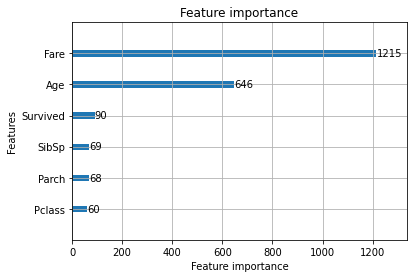

In [7]:
lgb.plot_importance(model)

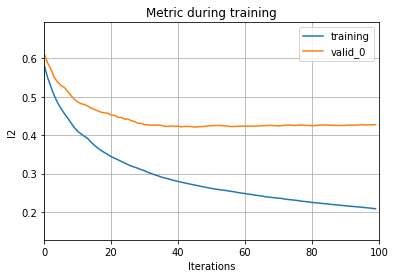

In [8]:
lgb.plot_metric(model)

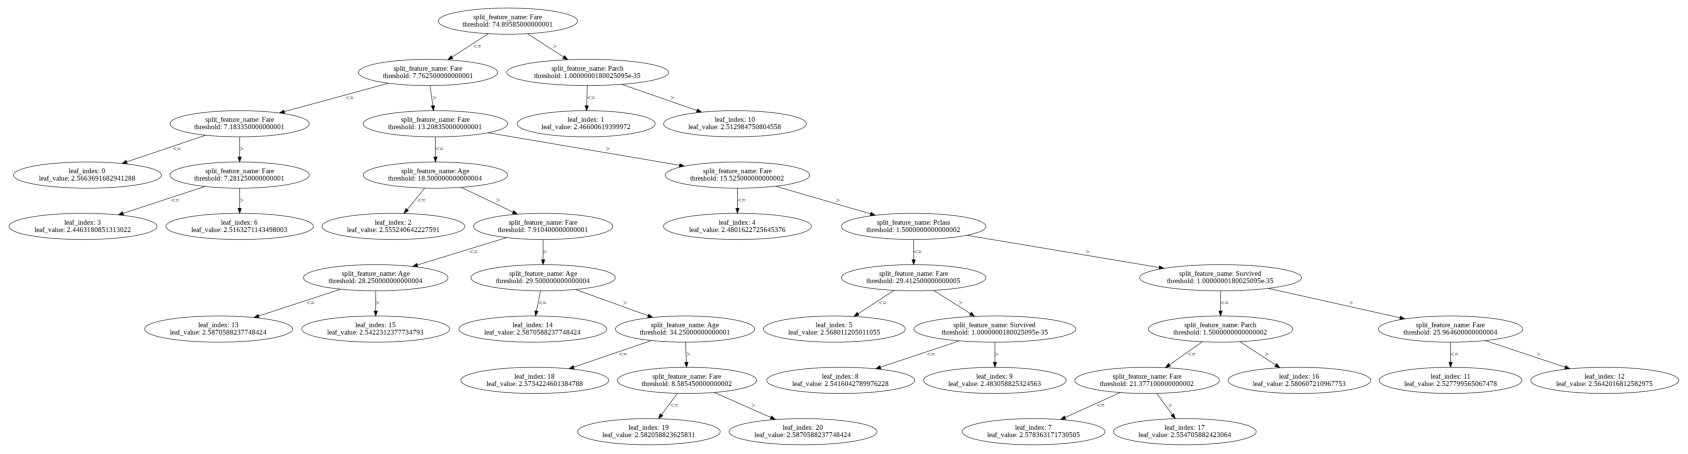

In [9]:
lgb.plot_tree(model,figsize=(30,40))

References: https://towardsdatascience.com/how-to-beat-the-heck-out-of-xgboost-with-lightgbm-comprehensive-tutorial-5eba52195997